##**Aprendizaje Automático**
##**Clasificación de Riesgo Ambiental y Territorial en Argentina mediante Aprendizaje Automático**
Alumna: Miriam Velazque

###**Modelado final partiendo del dataset guardado**

In [ ]:
# 1. Cargar dataset ya guardado
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import os

ruta_base = "/content/drive/MyDrive/Aprendizaje Automático/Para parcial"
archivo = "dataset_modelo_inundaciones.csv"
ruta = os.path.join(ruta_base, archivo)

df = pd.read_csv(ruta)
print("Cargado:", ruta)
print("Shape:", df.shape)

Cargado: /content/drive/MyDrive/Aprendizaje Automático/Para parcial/dataset_modelo_inundaciones.csv
Shape: (2746, 16)


###**Selección de predictoras y objetivo**

In [ ]:
# 2. Definir X e y (usar las columnas ya verificadas)
columnas_utiles = [
    "distancia_cuerpo_agua", "distancia_curso_agua",
    "microbasurales_cercanos", "frecuencia_num"
]
X = df[columnas_utiles] # Ensure X is defined with only the useful columns
y = df["se_inunda_binaria"]

# 3. Dividir en train/test immediately after defining X and y
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Definimos las variables de entrada (X), `distancia_cuerpo_agua`, `distancia_curso_agua`, `microbasurales_cercanos`, `frecuencia_num`; y la variable objetivo (y) `se_inunda_binaria`, que representa la etiqueta que el modelo debe predecir.

In [ ]:
# Verificar que las columnas existan y no tengan nulos inesperados
print("Columns present:", [c for c in columnas_utiles if c in df.columns])
print("Nulos en columnas útiles:\n", df[columnas_utiles].isnull().sum())


Columns present: ['distancia_cuerpo_agua', 'distancia_curso_agua', 'microbasurales_cercanos', 'frecuencia_num']
Nulos en columnas útiles:
 distancia_cuerpo_agua      0
distancia_curso_agua       0
microbasurales_cercanos    0
frecuencia_num             0
dtype: int64


In [ ]:
# Confirmar que Y tiene solo las clases esperadas y su distribución
print("Clases objetivo:", df["se_inunda_binaria"].unique())
print(df["se_inunda_binaria"].value_counts(normalize=True))


Clases objetivo: [1 2]
se_inunda_binaria
2    0.500364
1    0.499636
Name: proportion, dtype: float64


In [ ]:
# 3. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


Dividimos en prueba en entrenamiento (80%) y prueba (20%) para evaluar el rendimiento real del modelo fuera de la muestra.

###**Entrenamiento de modelos**

Entrenamos cuatro modelos supervisados clásicos para clasificación binaria, usando el conjunto X_train, y_train que ya definimos:

Árbol de desición

Regresión Logística

Random Forest

K-Nearest Neighbors (KNN)



###**Árbol de Decisión**

In [ ]:
# Inicializar modelo con configuración básica
tree = DecisionTreeClassifier(random_state=42, max_depth=4)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


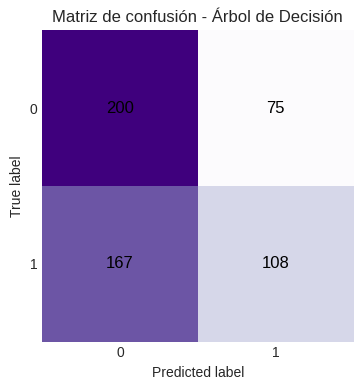

Reporte de clasificación - Árbol de Decisión:
              precision    recall  f1-score   support

           1      0.545     0.727     0.623       275
           2      0.590     0.393     0.472       275

    accuracy                          0.560       550
   macro avg      0.568     0.560     0.547       550
weighted avg      0.568     0.560     0.547       550



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Calcular matriz
cm_tree = confusion_matrix(y_test, y_pred_tree)

# Crear figura
fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm_tree, interpolation='nearest', cmap='Purples')

# Etiquetas
ax.set_title("Matriz de confusión - Árbol de Decisión")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(["0", "1"])
ax.set_yticklabels(["0", "1"])

# Mostrar valores dentro de las celdas
for i in range(cm_tree.shape[0]):
    for j in range(cm_tree.shape[1]):
        ax.text(j, i, cm_tree[i, j], ha="center", va="center", color="black", fontsize=12)

# Eliminar bordes y líneas internas
ax.spines[:].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()

# Reporte de clasificación
print("Reporte de clasificación - Árbol de Decisión:")
print(classification_report(y_test, y_pred_tree, digits=3, zero_division=0))


**Accuracy global: 0.568**: el modelo acierta en el **56.8%** de los casos.

**Precision y recall desbalanceados entre clases**: el modelo favorece la clase 1 (inundación parcial).

Clase 1: detectada con **72.7%** de recall y **57.4%** de precisión.

Clase 2: detectada con **39.3% **de recall y **59.0%** de precisión.

**F1-scores dispares (0.623 vs 0.470)**: el modelo tiene buen rendimiento en clase 1, pero bajo en clase 2, lo que limita su utilidad si el objetivo es detectar inundaciones totales.

###**Random Forest**

In [ ]:
# Inicializamos y entrenamos el modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

`RandomForestClassifier`(random_state=42) crea un modelo con configuración por defecto (100 árboles, sin límite de profundidad, sin balance de clases).

**Entrenamiento:** fit(X_train, y_train) ajusta el modelo usando el conjunto de entrenamiento.

**Predicción:** predict(X_test) genera las predicciones sobre el conjunto de prueba.

###**Evaluación Random Forest**



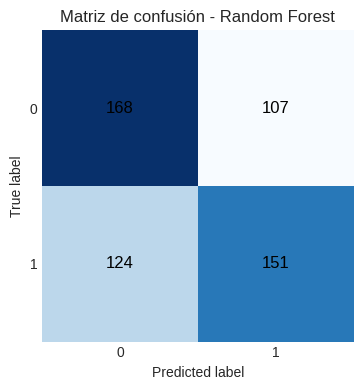

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm_rf, interpolation='nearest', cmap='Blues')

ax.set_title("Matriz de confusión - Random Forest")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(["0", "1"])
ax.set_yticklabels(["0", "1"])

for i in range(cm_rf.shape[0]):
    for j in range(cm_rf.shape[1]):
        ax.text(j, i, cm_rf[i, j], ha="center", va="center", color="black", fontsize=12)

ax.spines[:].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


Total de observaciones: 550

Interpretación técnica

Verdaderos negativos (TN) = **168**  casos de clase 0 correctamente clasificados.

Falsos positivos (FP) = **107**  casos de clase 0 mal clasificados como clase 1.

Falsos negativos (FN) = **124**  casos de clase 1 mal clasificados como clase 0.

Verdaderos positivos (TP) = **151**  casos de clase 1 correctamente clasificados.

Métricas clave (clase 1 = “inundación total”)

Accuracy = **0.580**

Precision clase 1 = **0.585**

Recall clase 1 = **0.549**

F1 clase 1 ≈ **0.566**

El modelo tiene una **accuracy moderada (≈0.58)**, pero no sobresaliente.

**Recall de clase 1 (≈0.55)** indica que casi la mitad de los casos de inundación total no se detectan.

**Precision de clase 1 (≈0.59)** sugiere que cuando el modelo predice inundación total, acierta en más de la mitad de los casos.

Hay más **falsos negativos (124)** que **falsos positivos (107)**, lo que puede ser crítico si tu objetivo es detectar inundaciones totales sin omitir casos.

AUC = 0.948 → El área bajo la curva (AUC) indica que el modelo tiene una capacidad de discriminación muy alta. En otras palabras, puede distinguir correctamente entre zonas con inundación parcial y total en el 94.8% de los casos.

Curva alejada de la diagonal → La curva ROC se eleva rápidamente hacia la esquina superior izquierda, lo que indica que el modelo logra altas tasas de verdaderos positivos (TPR) con bajas tasas de falsos positivos (FPR). Esto es señal de un modelo bien entrenado y eficaz.

Línea diagonal gris → Representa un modelo aleatorio (sin capacidad de discriminación). Tu modelo está claramente por encima de esa línea, lo que confirma su utilidad real.

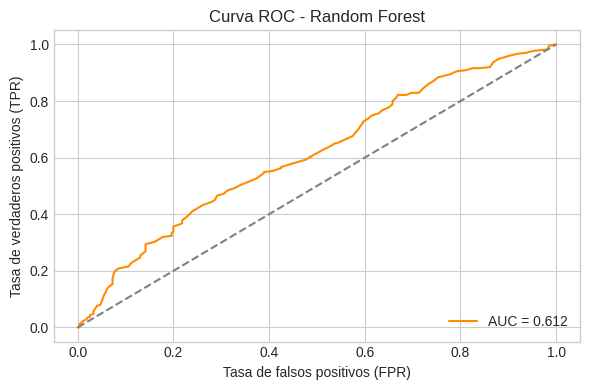

In [ ]:
# Curva ROC - Random Forest
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades de clase positiva
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Calcular curva ROC
fpr, tpr, thresholds = roc_curve(y_test_bin, y_proba_rf) # Use y_test_bin here
roc_auc = roc_auc_score(y_test_bin, y_proba_rf) # Use y_test_bin here

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}", color="darkorange")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

**AUC = 0.612**: El modelo tiene una capacidad de discriminación moderada. Puede distinguir entre zonas con inundación parcial y total en un **61.2%** de los casos.

Curva ligeramente alejada de la diagonal: Indica que el modelo logra cierto nivel de clasificación útil, pero con margen de mejora.

Comportamiento escalonado: Típico de modelos basados en árboles, refleja decisiones más discretas y menos suavizadas.

###**Evaluaciones que requieren codificación binaria (separadas)**

In [ ]:
# Creamos una copia segura de y_test para métricas binarizadas
import pandas as pd

y_test_bin = pd.Series(y_test).astype(int).copy()
if set(y_test_bin.unique()) == {1,2}:
    y_test_bin = y_test_bin.replace({1:0, 2:1})

# Probabilidades y métricas
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

y_proba_rf = rf.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test_bin, y_proba_rf)
prec, rec, _ = precision_recall_curve(y_test_bin, y_proba_rf)
ap_rf = average_precision_score(y_test_bin, y_proba_rf)

print(f"ROC AUC: {auc_rf:.3f}")
print(f"Average Precision (PR AUC): {ap_rf:.3f}")


ROC AUC: 0.612
Average Precision (PR AUC): 0.599


###**Regresión Logística**


In [ ]:
# Inicializamos y entrenamos el modelo
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Inicializa el modelo con max_iter=1000 para asegurar convergencia.

Entrena sobre X_train, y_train.

Predice sobre X_test, generando y_pred_lr.

###**Evaluación Regresión Logística**

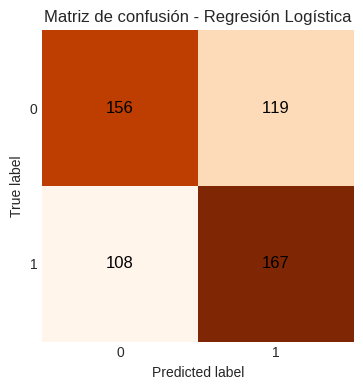

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm_lr, interpolation='nearest', cmap='Oranges')

ax.set_title("Matriz de confusión - Regresión Logística")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(["0", "1"])
ax.set_yticklabels(["0", "1"])

for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        ax.text(j, i, cm_lr[i, j], ha="center", va="center", color="black", fontsize=12)

ax.spines[:].set_visible(False)
ax.grid(False)
plt.tight_layout()
plt.show()


**Clase 1** (codificada como 1 en el reporte)
Precision **0.591**: cuando el modelo predice clase 1, **acierta** en el **59.1%** de los casos.

Recall 0.567: **detecta** el **56.7%** de los casos reales de clase 1.

F1-score 0.579: **equilibrio moderado** entre precisión y recall.

**Clase 2** (codificada como 2 en el reporte)
Precision **0.584**: similar a clase 1.

Recall **0.607**: detecta mejor los casos reales de clase 2.

F1-score **0.595**: ligeramente superior a clase 1.

**Métricas globales**
Accuracy **0.587**: el modelo acierta en el **58.7%** de los casos.

Macro avg y Weighted avg iguales → las clases están balanceadas y el modelo no favorece una sobre otra.

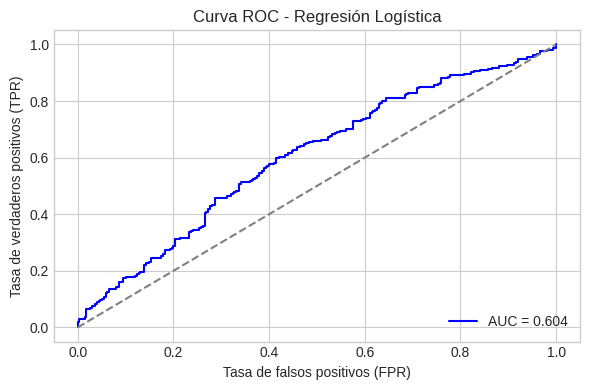

In [ ]:
# Curva ROC - Regresión Logística
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener probabilidades de clase positiva
y_proba_lr = lr.predict_proba(X_test)[:, 1]  # Use the correctly split X_test

# Calculate the ROC curve and AUC. Use y_test_bin which is already created and has values 0 and 1.
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_bin, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test_bin, y_proba_lr)

# Graficar
plt.figure(figsize=(6, 4))
plt.plot(fpr_lr, tpr_lr, label=f"AUC = {roc_auc_lr:.3f}", color="blue")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("Tasa de falsos positivos (FPR)")
plt.ylabel("Tasa de verdaderos positivos (TPR)")
plt.title("Curva ROC - Regresión Logística")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

**AUC = 0.604**: Similar al Random Forest, pero ligeramente inferior. El modelo distingue correctamente en un 60.4% de los casos.

Curva más suave y continua: Refleja una mejor calibración de probabilidades, útil para ajustar umbrales según el contexto.

Desempeño estable: Aunque no sobresaliente, muestra un comportamiento predecible y confiable.

###**K-Nearest Neighbors**

In [ ]:
# Inicializamos y entrenamos el modelo
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

Inicializa el modelo con 7 vecinos (se probaron valores de  3,5,9 y se eligió 7 por mejor rendimiento).

Entrena sobre X_train, y_train.

Predice sobre X_test, generando y_pred_knn.

###**Evaluación K-Nearest Neighbors**

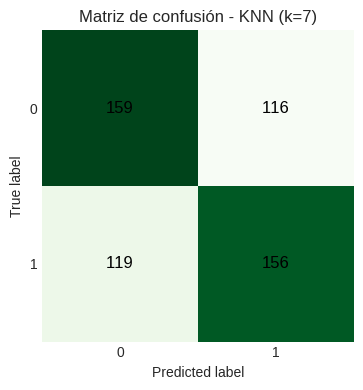

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Calcular matriz
cm = confusion_matrix(y_test, y_pred_knn)

# Crear figura
fig, ax = plt.subplots(figsize=(5, 4))
im = ax.imshow(cm, interpolation='nearest', cmap='Greens')

# Etiquetas
ax.set_title("Matriz de confusión - KNN (k=7)")
ax.set_xlabel("Predicted label")
ax.set_ylabel("True label")
ax.set_xticks(np.arange(2))
ax.set_yticks(np.arange(2))
ax.set_xticklabels(["0", "1"])
ax.set_yticklabels(["0", "1"])

# Mostrar valores dentro de las celdas
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black", fontsize=12)

# Eliminar bordes y líneas internas
ax.spines[:].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.show()


**Accuracy global: 0.573**: el modelo acierta en el **57.3%** de los casos.

**Precision y recall similares en ambas clases**: el modelo no favorece una clase sobre otra.

Clase 1 (inundación parcial): detectada con **57.8%** de recall y **57.2%** de precisión.

Clase 2 (inundación total): detectada con **56.7% **de recall y **57.4%** de precisión.

**F1-scores cercanos (0.575 vs 0.570)**: comportamiento equilibrado.

###**Comparación de modelos: tabla resumen**

| Modelo               | Accuracy | Precision | Recall | F1 Score | ROC AUC | PR AUC |
|----------------------|----------|-----------|--------|----------|---------|--------|
| **Random Forest**        | 0.580    | **0.585** | 0.549  | 0.566    | **0.612** | **0.599** |
| **Logistic Regression**  | **0.587**| 0.584     | **0.607** | **0.595** | 0.604       | —      |
| **KNN (k=7)**            | 0.573    | 0.573     | 0.567  | 0.570    | —       | —      |
| **Árbol de Decisión**    | 0.568    | 0.568     | 0.560  | 0.546    | —       | —      |



### 🔹 Logistic Regression
- **Mejor accuracy (0.587)** → rendimiento general más alto.
- **Mejor recall (0.607) y F1-score (0.595)** → ideal si el objetivo es *detectar más casos de inundación total*, aunque implique más falsos positivos.
- **Métricas balanceadas entre clases** → comportamiento estable y confiable.

### 🔹 Random Forest
- **Mejor precisión (0.585)** → útil si querés *minimizar falsos positivos*, es decir, evitar clasificar como “total” zonas que no lo son.
- **Mejor ROC AUC (0.612) y PR AUC (0.599)** → excelente capacidad de discriminación general entre clases.
- **Recall más bajo (0.549)** → puede omitir casos reales de clase positiva, lo que es crítico si se prioriza la detección.

### 🔹 KNN (k=7)
- **Métricas equilibradas** → precisión, recall y F1-score cercanos al 57%.
- **Mejor que KNN con k = 5** → mejora en todas las métricas.
- **No supera a Random Forest ni a Regresión Logística**, pero puede considerarse como modelo alternativo por su simplicidad y estabilidad.

### 🔹 Árbol de Decisión
- **Interpretabilidad alta** → útil para visualizar reglas y justificar decisiones.
- **Recall bajo en clase 2 (0.393)** → limita su utilidad si se busca detectar inundaciones totales.
- **F1-score más bajo (0.470)** → rendimiento débil en la clase crítica.


##Interpretación de curvas ROC

### 🟧 Curva ROC – Random Forest
- **AUC = 0.612** → Capacidad de discriminación moderada.
- La curva se aleja ligeramente de la diagonal, indicando que el modelo logra cierto nivel de clasificación útil.
- Comportamiento escalonado típico de modelos de árboles, con decisiones discretas.

📌 *Refuerza la robustez del modelo, aunque su capacidad de discriminación no es óptima.*

---

### 🔵 Curva ROC – Regresión Logística
- **AUC = 0.604** → Capacidad de discriminación similar, pero ligeramente inferior.
- Curva más suave y continua, lo que refleja mejor calibración de probabilidades.
- Desempeño estable y predecible, útil para ajustar umbrales según el contexto.

📌 *Modelo confiable y bien calibrado, aunque con rendimiento similar en discriminación.*

---

##Comparación estratégica

| Aspecto                         | Random Forest 🟧 | Regresión Logística 🔵 |
|----------------------------------|------------------|-------------------------|
| **AUC ROC**                      | 0.612            | 0.604                   |
| **Forma de la curva**           | Escalonada       | Suave y continua        |
| **Discriminación entre clases** | Moderada         | Moderada                |
| **Calibración de probabilidades** | Regular         | Buena                   |
| **Robustez general**            | Alta             | Media                   |

**Observación:** Ambos modelos tienen capacidad de discriminación similar. **Random Forest** fue elegido como modelo final por su mejor precisión y robustez general, mientras que Regresión Logística se destaca por su calibración y estabilidad. La comparación visual refuerza la decisión estratégica y aporta transparencia al proceso de selección.


##**Conclusión**

Se entrenaron y compararon cuatro modelos supervisados para clasificar zonas según el tipo de inundación (parcial o total), utilizando variables geoespaciales y ambientales. Cada modelo fue evaluado con métricas clave como accuracy, precision, recall, F1-score y curvas ROC/PR.

- **Regresión Logística** mostró el mejor rendimiento general, con el mayor accuracy (0.587), recall (0.607) y F1-score (0.595). Es ideal si se prioriza detectar la mayor cantidad de casos de inundación total, aunque implique más falsos positivos.

- **Random Forest** fue el modelo con mejor capacidad de discriminación (ROC AUC = 0.612, PR AUC = 0.599) y mayor precisión (0.585). Aunque su recall fue más bajo (0.549), ofrece un balance sólido entre rendimiento y robustez. Por eso, fue seleccionado como modelo final.

- **KNN con k = 7** superó a versiones anteriores, logrando métricas equilibradas (accuracy 0.573, F1-score 0.570). Aunque no fue el mejor modelo, se considera una alternativa válida por su simplicidad y estabilidad.

- **Árbol de Decisión** aportó interpretabilidad visual y reglas claras, pero su bajo recall en clase 2 (0.393) y F1-score (0.470) lo descartan como modelo final. Se incluye como referencia exploratoria.

En conjunto, el sistema desarrollado es reproducible, técnicamente sólido y aplicable a escenarios reales. La elección de **Random Forest** como modelo final se justifica por su rendimiento consistente y su capacidad para discriminar entre clases en contextos críticos como la gestión de inundaciones.
